# Test MSSR(A) on color image

In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
SE_size_factor = 0.02
lam_factor = 5
area_factor = 0.03
connectivity = 4
min_thres = 1
max_thres = 255
stepsize = 10
perc = 0.6
lam = 45

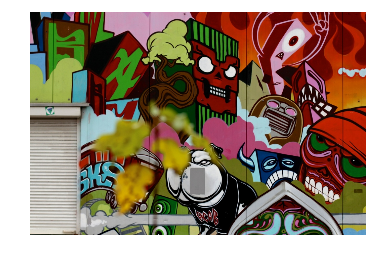

In [19]:
#Load the image
path_to_image = '../tests/images/Color/color.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [20]:
#our detection object
det = sr.MSSRDetector(
            min_thres=min_thres, max_thres=max_thres, step=stepsize,
            perc=perc, SE_size_factor=SE_size_factor,
            lam_factor=lam_factor,
            area_factor=area_factor,
            connectivity=connectivity)

In [21]:
# detection
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
print(det.lam, det.SE.shape)#, lam

45 (17, 17)


In [27]:
holes_matlab, islands_matlab, _, _ = sr.read_matfile(
            os.path.join('../tests/features/Color/', 'color_allregions.mat'), visualize=False)

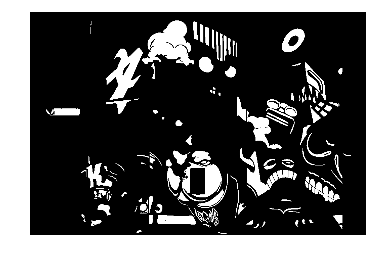

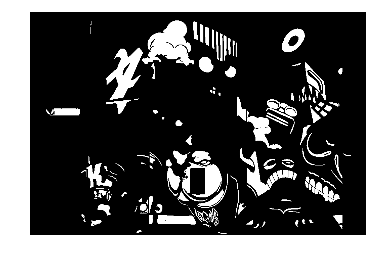

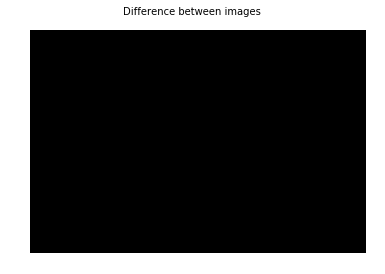

True


In [28]:
sr.show_image(islands_matlab)
sr.show_image(regions['islands'])
print(sr.image_diff(islands_matlab, regions['islands'] ))


In [29]:
assert det.lam == lam

{'protrusions': 92, 'indentations': 101, 'holes': 80, 'islands': 149}


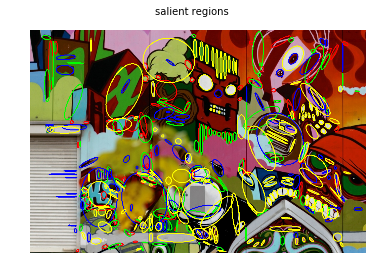

In [30]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'protrusions': 91, 'indentations': 82, 'holes': 80, 'islands': 149}


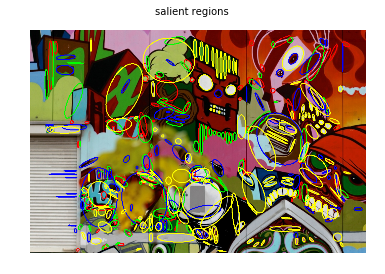

In [31]:
#sr.read_matfile('../tests/features/Color/color_allregions.mat', 
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/features/Color/color_allregions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsra, features_standard_dmsra, features_poly_dmsra = sr.binary_mask2ellipse_features(regions_dmsra, 
                                                                                connectivity=connectivity)
print(num_regions_dmsra)
sr.visualize_elements_ellipses(img, features_standard_dmsra);

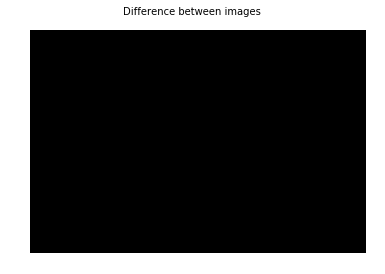

True


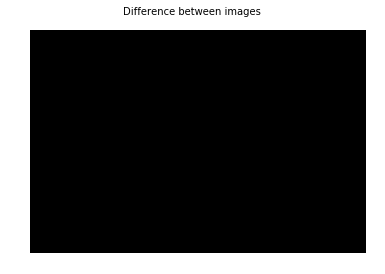

True


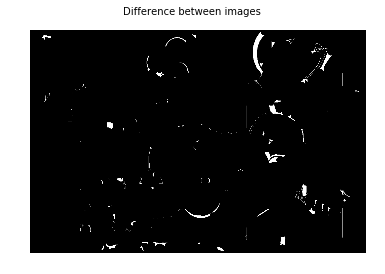

False


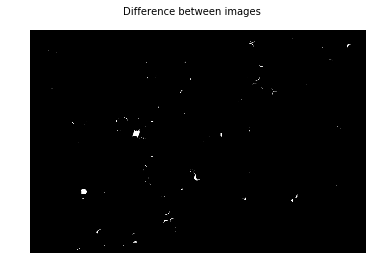

False


In [32]:
print(sr.image_diff(regions['holes'], holes_true))
print(sr.image_diff(regions['islands'], islands_true))
print(sr.image_diff(regions['indentations'], indents_true))
print(sr.image_diff(regions['protrusions'], prots_true))

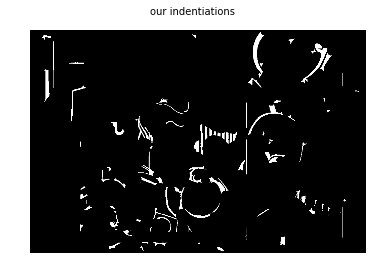

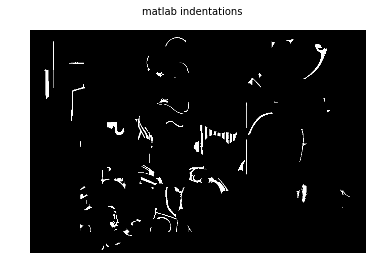

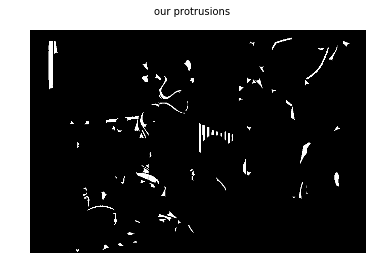

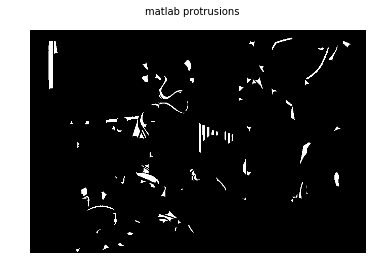

In [33]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)